# EDA

In [86]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')


In [87]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision', 3)

In [88]:
# Cargamos la información de todas las plantas y sensores
df_plant1_gen = pd.read_csv('DATASETS/Plant_1_Generation_Data.csv', parse_dates=["DATE_TIME"])
df_plant1_weather = pd.read_csv('DATASETS/Plant_1_Weather_Sensor_Data.csv', parse_dates=["DATE_TIME"])
df_plant2_gen = pd.read_csv('DATASETS/Plant_2_Generation_Data.csv', parse_dates=["DATE_TIME"])
df_plant2_weather = pd.read_csv('DATASETS/Plant_2_Weather_Sensor_Data.csv', parse_dates=["DATE_TIME"])

In [91]:
# Concatenamos la informacion de la planta 1 y 2
df_gen = pd.concat([df_plant1_gen, df_plant2_gen], ignore_index=True)

In [92]:
# Concatenamos la informacion de la planta 1 y 2
df_sensors = pd.concat([df_plant1_weather, df_plant2_weather], ignore_index=True)

In [93]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136476 entries, 0 to 136475
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.3+ MB


In [94]:
df_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 302.1+ KB


In [95]:
print(df_gen['SOURCE_KEY'].unique().size)
print(df_sensors['SOURCE_KEY'].unique().size)

print(df_gen['PLANT_ID'].unique().size)
print(df_sensors['PLANT_ID'].unique().size)


44
2
2
2


In [96]:
df = df_gen.merge(df_sensors, on=["DATE_TIME", "PLANT_ID"], suffixes=("_GENERATION", "_WEATHER"))
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_GENERATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WEATHER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6.988e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.603e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7.159e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0


In [97]:
df.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,136472,1.365e+05,136472.000,136472.000,136472.000,1.365e+05,136472.000,136472.000,136472.000
mean,2020-06-01 09:22:57.605662464,4.135e+06,1708.374,274.790,3295.366,3.304e+08,26.763,31.921,0.231
min,2020-05-15 00:00:00,4.135e+06,0.000,0.000,0.000,0.000e+00,20.399,18.140,0.000
25%,2020-05-23 23:00:00,4.135e+06,0.000,0.000,28.286,6.520e+06,23.638,22.412,0.000
50%,2020-06-01 18:45:00,4.135e+06,5.993,3.493,2834.643,7.269e+06,25.908,26.414,0.026
75%,2020-06-09 21:45:00,4.136e+06,1155.595,532.569,5992.000,2.826e+08,29.267,40.779,0.443
max,2020-06-17 23:45:00,4.136e+06,14471.125,1410.950,9873.000,2.248e+09,39.182,66.636,1.222
std,NaN,5.000e+02,3222.079,380.180,3035.313,6.086e+08,3.897,11.804,0.306


In [98]:
df['DATE_TIME'].dt.date.nunique()

34

In [99]:
df.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
dtype: int64

In [100]:
df = df.sort_values(["PLANT_ID", "DATE_TIME"]).reset_index(drop=True)

# Producción diaria de energía

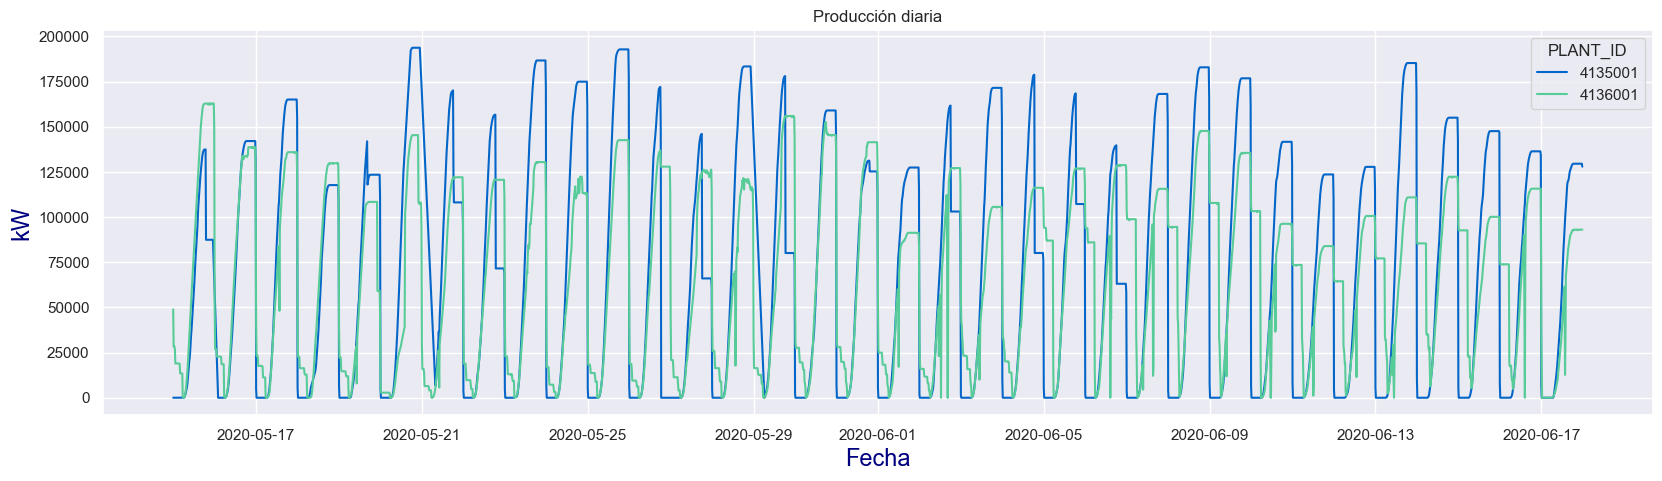

In [112]:
df_group = df.groupby(['DATE_TIME', 'PLANT_ID']).sum().reset_index()
df_group['time']= df['DATE_TIME'].dt.time

fig, ax = plt.subplots(dpi=100, figsize=(20,5))
# daily yield plot
sns.lineplot(data=df_group, x='DATE_TIME', y='DAILY_YIELD', hue='PLANT_ID', ax=ax, palette=["#0466c8", "#57cc99"])
#df_group.plot(x='DATE_TIME', y='DAILY_YIELD', hue='PLANT_ID', ax=ax)
# AC & DC power plot
# df_plant1_gen_group.set_index('time').drop(['DATE_TIME'], axis=1)[['AC_POWER','DC_POWER']].plot(style='o', ax=ax[1])

ax.set_title('Producción diaria',)
# ax[1].set_title('AC power & DC power during day hours')
ax.set_ylabel('kW',color='navy',fontsize=17)
ax.set_xlabel('Fecha',color='navy',fontsize=17)

plt.show()


In [114]:
df['PLANT_ID'].unique()

array([4135001, 4136001], dtype=int64)

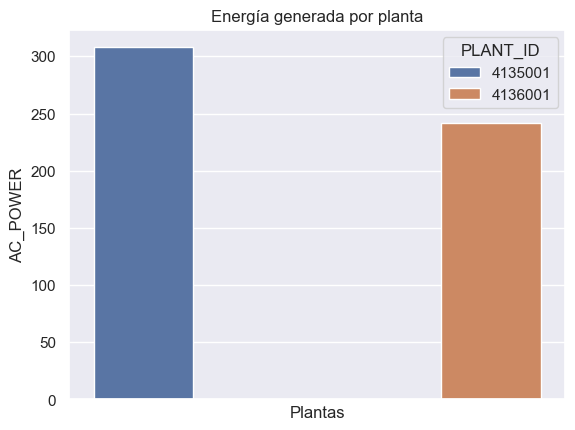

In [117]:

g = sns.barplot(data=df, x='PLANT_ID', y='AC_POWER', hue='PLANT_ID', ci=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


g.set_title("Energía generada por planta")
g.set(xlabel='Plantas')

plt.show()

# Parte 2

In [118]:
# Agregamos de manera separada los campos de fecha y hora al dataframe
df["DATE"] = pd.to_datetime(df["DATE_TIME"]).dt.date
df["TIME"] = pd.to_datetime(df["DATE_TIME"]).dt.time
df['DAY'] = pd.to_datetime(df['DATE_TIME']).dt.day
df['MONTH'] = pd.to_datetime(df['DATE_TIME']).dt.month
df['WEEK'] = pd.to_datetime(df['DATE_TIME']).dt.isocalendar().week


# add hours and minutes for ml models
df['HOURS'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.hour
df['MINUTES'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.minute
df['TOTAL MINUTES PASS'] = df['MINUTES'] + df['HOURS']*60

# Agregamos la fecha como columnas de tipo string
df["DATE_STRING"] = df["DATE"].astype(str) # fecha como string
df["HOURS"] = df["HOURS"].astype(str)
df["TIME"] = df["TIME"].astype(str)

In [119]:
df.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY_GENERATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WEATHER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,HmiyD2TTLFNqkNe,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136472 entries, 0 to 136471
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE_TIME              136472 non-null  datetime64[ns]
 1   PLANT_ID               136472 non-null  int64         
 2   SOURCE_KEY_GENERATION  136472 non-null  object        
 3   DC_POWER               136472 non-null  float64       
 4   AC_POWER               136472 non-null  float64       
 5   DAILY_YIELD            136472 non-null  float64       
 6   TOTAL_YIELD            136472 non-null  float64       
 7   SOURCE_KEY_WEATHER     136472 non-null  object        
 8   AMBIENT_TEMPERATURE    136472 non-null  float64       
 9   MODULE_TEMPERATURE     136472 non-null  float64       
 10  IRRADIATION            136472 non-null  float64       
 11  DATE                   136472 non-null  object        
 12  TIME                   136472 non-null  obje

In [121]:
df.isnull().sum()

DATE_TIME                0
PLANT_ID                 0
SOURCE_KEY_GENERATION    0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
SOURCE_KEY_WEATHER       0
AMBIENT_TEMPERATURE      0
MODULE_TEMPERATURE       0
IRRADIATION              0
DATE                     0
TIME                     0
DAY                      0
MONTH                    0
WEEK                     0
HOURS                    0
MINUTES                  0
TOTAL MINUTES PASS       0
DATE_STRING              0
dtype: int64

In [150]:
def plot_date(df, date):
    
    ''' Plot data of the specified date'''
    
    plants = df.PLANT_ID.unique()
    # df = df.loc[df.DATE_TIME.apply(lambda x: x.date()) == pd.Timestamp(date).date()]
    y_list = ["DC_POWER", "AC_POWER", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
    x = "DATE"
    colors = ["C{}".format(i) for i in range(len(y_list))]
    
    fig,ax = plt.subplots(1, len(y_list), figsize=(7*len(y_list),5))
    palette = sns.color_palette("mako_r")

    for i,y in enumerate(y_list):
        sns.lineplot(data=df, x=x, y=y, hue="PLANT_ID", palette=palette, ax=ax[i])
        ax[i].set_xlabel("")
        ax[i].tick_params(axis="x", rotation=45)

In [123]:
df = df.sort_values(["PLANT_ID", "DATE_TIME"]).reset_index(drop=True)

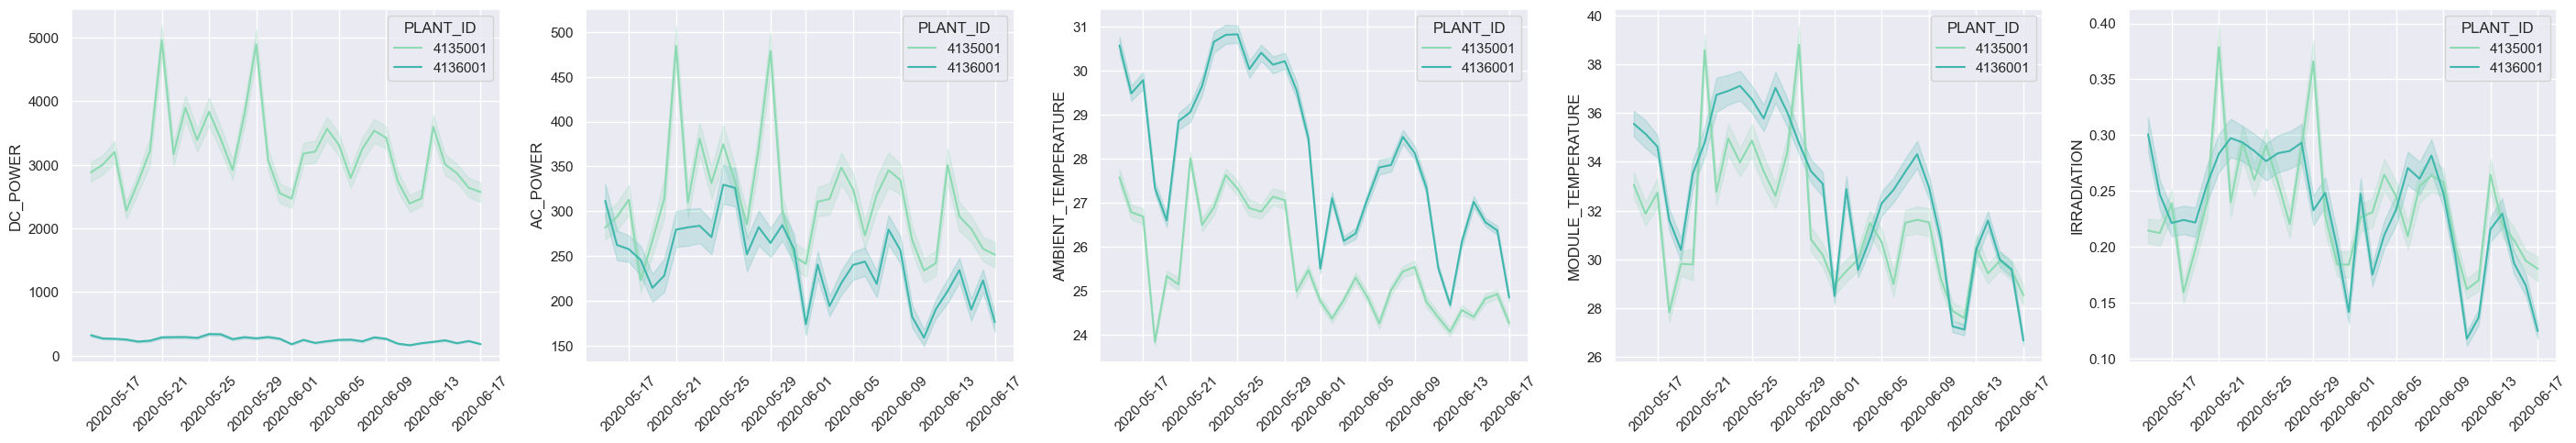

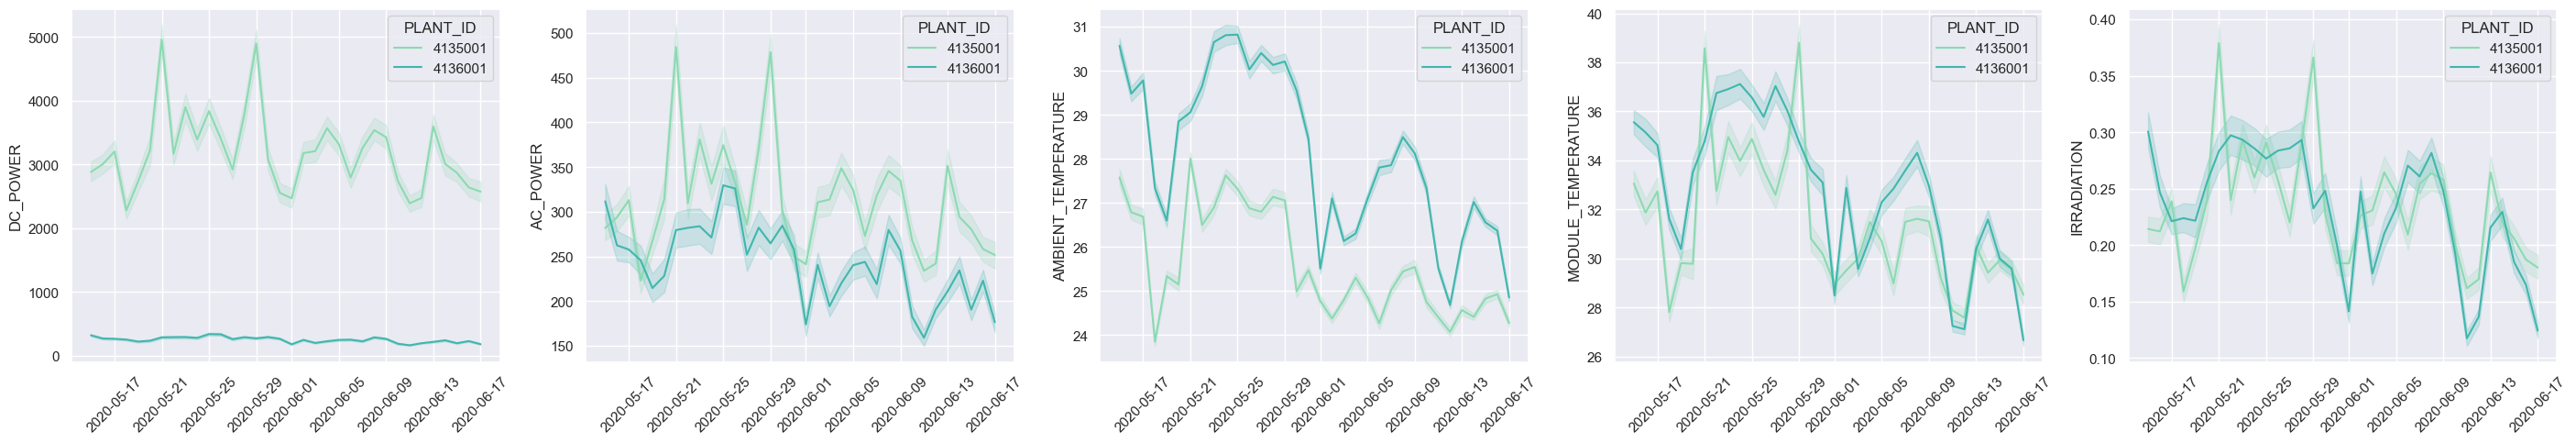

In [151]:
for date in ["2020-05-15", "2020-06-17"]:
    plot_date(df, date)

In [141]:
df.PLANT_ID.unique()

array([4135001, 4136001], dtype=int64)

In [40]:
df_plant1.SOURCE_KEY.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [48]:
range(1, 23)

range(1, 23)

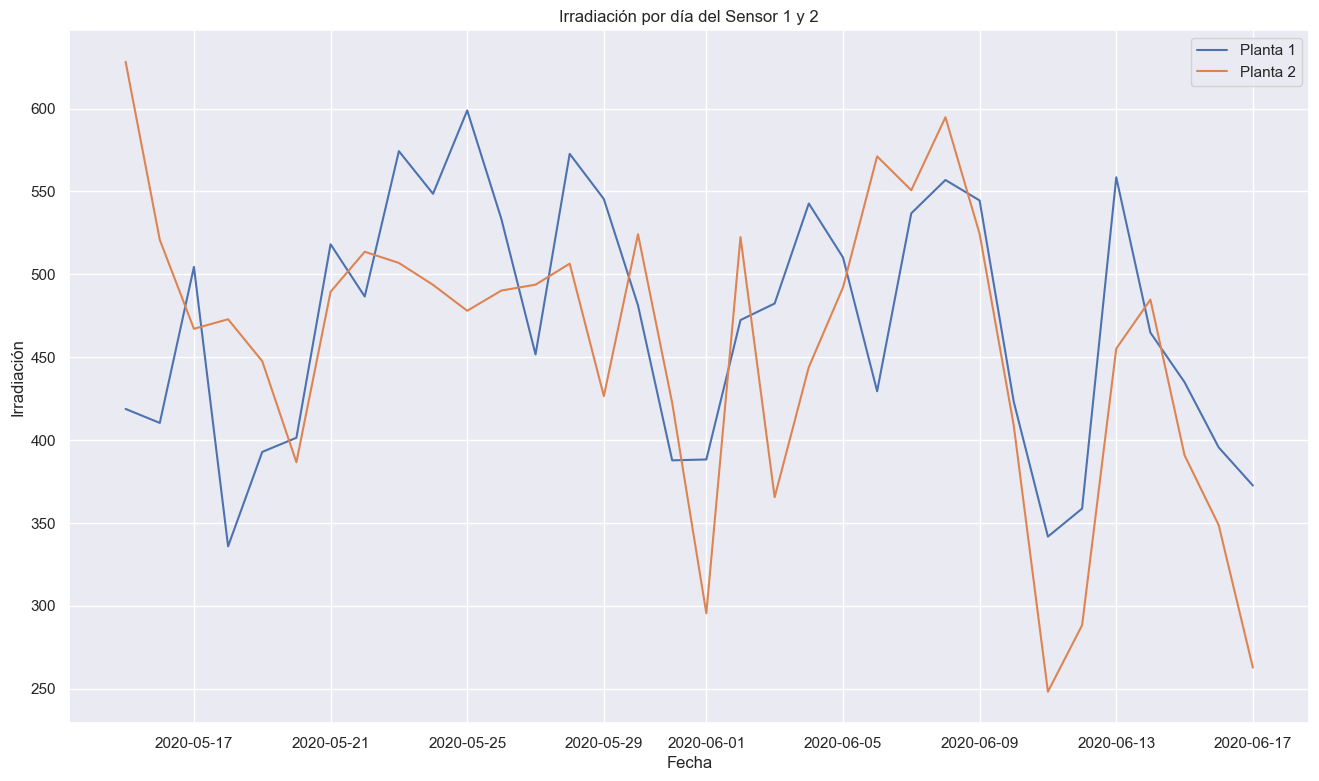

In [149]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df[df.PLANT_ID == 4135001].groupby('DATE')['IRRADIATION'].sum(), label="Planta 1")
ax.plot(df[df.PLANT_ID == 4136001].groupby('DATE')['IRRADIATION'].sum(), label="Planta 2")
plt.title('Irradiación por día del Sensor 1 y 2')
plt.xlabel('Fecha')
plt.ylabel('Irradiación')
ax.legend()
plt.show()


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136472 entries, 0 to 136471
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE_TIME              136472 non-null  datetime64[ns]
 1   PLANT_ID               136472 non-null  int64         
 2   SOURCE_KEY_GENERATION  136472 non-null  object        
 3   DC_POWER               136472 non-null  float64       
 4   AC_POWER               136472 non-null  float64       
 5   DAILY_YIELD            136472 non-null  float64       
 6   TOTAL_YIELD            136472 non-null  float64       
 7   SOURCE_KEY_WEATHER     136472 non-null  object        
 8   AMBIENT_TEMPERATURE    136472 non-null  float64       
 9   MODULE_TEMPERATURE     136472 non-null  float64       
 10  IRRADIATION            136472 non-null  float64       
 11  DATE                   136472 non-null  object        
 12  TIME                   136472 non-null  obje

In [169]:
losses = df.copy()
losses = losses.groupby('DATE')
losses['AC_POWER'].sum()/losses['DC_POWER'].sum()*100

DATE
2020-05-15    19.102
2020-05-16    17.615
2020-05-17    16.476
2020-05-18    18.527
2020-05-19    16.421
2020-05-20    15.184
2020-05-21    15.749
2020-05-22    16.118
2020-05-23    15.203
2020-05-24    15.294
2020-05-25    15.812
2020-05-26    16.423
2020-05-27    15.879
2020-05-28    15.260
2020-05-29    15.383
2020-05-30    17.380
2020-05-31    18.033
2020-06-01    15.646
2020-06-02    16.178
2020-06-03    14.915
2020-06-04    15.143
2020-06-05    15.935
2020-06-06    17.185
2020-06-07    15.438
2020-06-08    16.357
2020-06-09    16.039
2020-06-10    15.395
2020-06-11    15.404
2020-06-12    16.228
2020-06-13    14.754
2020-06-14    16.285
2020-06-15    15.384
2020-06-16    16.790
2020-06-17    15.669
dtype: float64

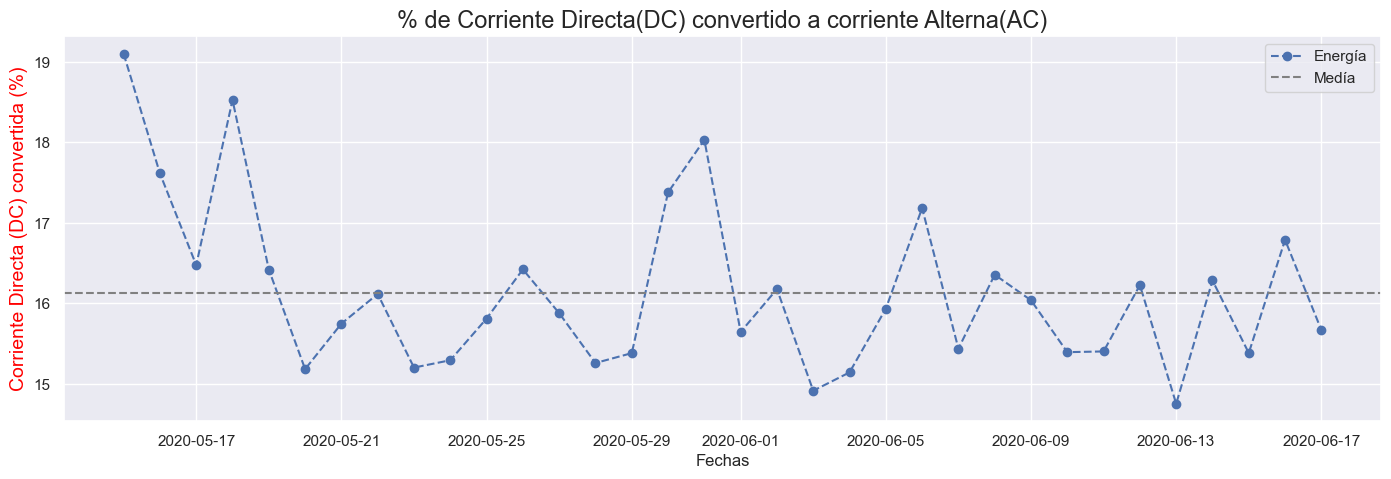

In [174]:
losses = df.copy()
losses = losses.groupby('DATE')
losses2 = losses['AC_POWER'].sum()/losses['DC_POWER'].sum()*100

losses2.plot(style='o--', figsize=(17,5), label='Energía')

plt.title('% de Corriente Directa(DC) convertido a corriente Alterna(AC)', size=17)
plt.ylabel('Corriente Directa (DC) convertida (%)', fontsize=14, color='red')
plt.xlabel("Fechas")
plt.axhline(losses2.mean(), linestyle='--',color='gray',label='Medía')
plt.legend()
plt.show()